
## Airbnb 

This project will be using the [Airbnb dataset](http://insideairbnb.com/get-the-data.html) for NYC called `listings.csv`. You can download it directly [here](http://data.insideairbnb.com/united-states/ny/new-york-city/2021-11-02/visualisations/listings.csv)

step 1) Producing a Heatmap using the Folium package of the mean listing price per location (lattitude and longitude) over the NYC map. 


In [2]:
# imports 
import numpy as np
import pandas as pd
import csv
import folium 
from folium.plugins import HeatMap


# reading the file 
def read_file(filepath):
    df = pd.read_csv(filepath)
    return df

df = read_file("listings.csv")
df.dropna()
#df.describe()
df.head()
#df.info()


FileNotFoundError: [Errno 2] No such file or directory: 'listings.csv'

In [ ]:
# heatmap of the mean listing price per location over the NYC map 

# step 1: generate base map with default_location=[40.693943, -73.985880] 
from itertools import groupby

base_map1 = folium.Map(location=[40.693943, -73.985880])
base_map1


In [ ]:
# data points for heatmap:
mean_price = df.groupby(['latitude','longitude'], as_index = False)['price'].mean()


In [ ]:
# generating the heatmap
hm = HeatMap(mean_price)
base_map1.add_child(hm)



Step 2) Normalize the price by subtracting the mean and dividing by the standard deviation. Then reproduce the heatmap. 


In [ ]:
# create a base map
base_map2 = folium.Map(location=[40.693943, -73.985880])

# normalized price = (price - mean)/stdv

mean_price = df['price'].mean()
stdev_price = df['price'].std()
df['normalized price'] = (df['price'] - mean_price)/stdev_price

# data for heatmap:
df2 = df[['latitude', 'longitude', 'normalized price']]
#print(df2)

# generating the heatmap:
hm2 = HeatMap(df2)
base_map2.add_child(hm2)

# saving the heatmap as html file to open on browser
base_map2.save('index2.html')


-> this map is more standardized and accurate. I see that the gradient colors are more vivid and concentrated in this map.

Step 3) Normalize the original price using sklearn's [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the interval [0,1]. Then reproduce the Heatmap.



In [ ]:
# create a base map
base_map3 = folium.Map(location=[40.693943, -73.985880])

# Normalize the original price using sklearn MinMaxScalar to the interval [0,1]
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
df[['scaled']] = scaler.fit_transform(df[['price']])
#print(df[['scaled']])

# data for heatmap:
df3 = df[['latitude', 'longitude', 'scaled']]

# test
df[['scaled']].min(axis = 0)
df[['scaled']].max(axis = 0)

# reprodece Heatmap
hm3 = HeatMap(df3)
base_map3.add_child(hm3)

# save heatmap as html file 
base_map3.save('index3.html')


-> Translates each point individually such that it is in the given range of [0, 1]. This means that the data points are scaled in such a way that the min value is zero and max value is 1. I observe that this map is very similar to the folium map we plotted in part 1(a).

Step 4) Plot a bar chart of the average price (un-normalized) per room type. 


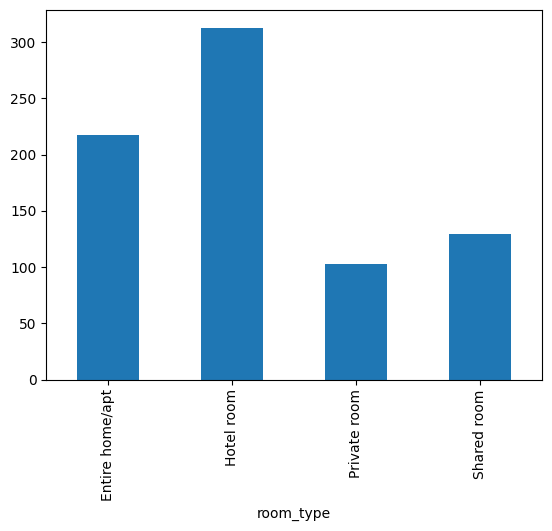

In [ ]:
# plot bar chart of avg price(un-normalized) per room type 
import matplotlib.pyplot as plt

data = df.groupby('room_type')['price'].mean()
data.plot(kind='bar')
plt.show()

-> rooms of type "Hotel room" is seen to be most expensive whereas, rooms of type "Private room" is least expensive.

Step 5) Plot on the NYC map the top 10 most expensive listings 

In [ ]:
# create a base map
base_map4 = folium.Map(location=[40.693943, -73.985880])

# most expensive
df = df.sort_values(by=['price'], ascending=False)
df_top = df.head(10)

# data for heatmap:
df4 = df_top[['latitude', 'longitude', 'price']]
print(df4)

# reprodece Heatmap
hm4 = HeatMap(df4)
base_map4.add_child(hm4)

# save heatmap as html file 
base_map4.save('index4.html')


       latitude  longitude  price
10155  40.76128  -73.93141  10000
15339  40.77184  -73.98835  10000
19746  40.74931  -73.97830  10000
24092  40.71918  -73.99123  10000
15614  40.76466  -73.92882  10000
23724  40.76387  -73.97653  10000
3724   40.79435  -73.93893   9999
20778  40.72031  -73.98813   9999
20780  40.72031  -73.98813   9999
20781  40.72031  -73.98813   9999


Step 6) Plot on the NYC map the top 10 most reviewed listings 

In [ ]:
# create a base map
base_map5 = folium.Map(location=[40.693943, -73.985880])

# most reviewed
df = df.sort_values(by=['number_of_reviews'], ascending=False)
df_top = df.head(10)

# data for heatmap:
df5 = df_top[['latitude', 'longitude', 'number_of_reviews']]
print(df5)

# reprodece Heatmap
hm5 = HeatMap(df5)
base_map5.add_child(hm5)

# save heatmap as html file 
base_map5.save('index5.html')


       latitude  longitude  number_of_reviews
20982  40.72440  -74.00794               1009
20366  40.75876  -73.98846                798
20993  40.74623  -73.98499                738
22645  40.72380  -73.99038                698
10822  40.66946  -73.76679                670
27864  40.70617  -74.01486                657
9056   40.66714  -73.99411                655
32015  40.76190  -73.98454                624
2991   40.71133  -73.95358                603
1409   40.71165  -73.95236                596


Step 7) Plot on the NYC map the top 10 most available listings 

In [ ]:
# create a base map
base_map6 = folium.Map(location=[40.693943, -73.985880])

# most available 
df = df.sort_values(by=['availability_365'], ascending=False)
df_top = df.head(10)

# data for heatmap:
df6 = df_top[['latitude', 'longitude', 'availability_365']]
print(df6)

# reprodece Heatmap
hm6 = HeatMap(df6)
base_map6.add_child(hm6)

# save heatmap as html file 
base_map6.save('index6.html')

       latitude  longitude  availability_365
29905  40.82995  -73.94860               365
24092  40.71918  -73.99123               365
2892   40.58861  -73.81489               365
9299   40.68515  -73.91856               365
36802  40.69048  -73.95139               365
26279  40.76250  -73.98161               365
23207  40.65588  -73.93791               365
28854  40.74361  -73.97249               365
37220  40.78369  -73.95117               365
18831  40.67761  -73.76363               365


Step 8) Using `longitude`, `latitude`, `price`, and `number_of_reviews`, use Kmeans to create 5 clusters. Plot the points on the NYC map.


In [ ]:
# create a base map
base_map7 = folium.Map(location=[40.693943, -73.985880])

# use k means to create 5 clusters 
# plot the points on the NYC map in color corresponding to their cluster 
from turtle import color
from sklearn.cluster import KMeans 

km = KMeans(n_clusters = 5)
clusters = km.fit_predict(df[['latitude', 'longitude', 'price', 'number_of_reviews']])
df['cluster_number'] = clusters
#df.head(10)

# cluster dataframes:
cl0 = df[df.cluster_number == 0]
cl1 = df[df.cluster_number == 1]
cl2 = df[df.cluster_number == 2]
cl3 = df[df.cluster_number == 3]
cl4 = df[df.cluster_number == 4]

# ploting markers
for value in cl0.iterrows():
    index = value[0]
    folium.Marker(location = [cl0['latitude'][index], cl0['longitude'][index]]).add_to(base_map7)

for value in cl1.iterrows():
    index = value[0]
    folium.Marker(location = [cl1['latitude'][index], cl1['longitude'][index]]).add_to(base_map7)

for value in cl2.iterrows():
    index = value[0]
    folium.Marker(location = [cl2['latitude'][index], cl2['longitude'][index]]).add_to(base_map7)

for value in cl3.iterrows():
    index = value[0]
    folium.Marker(location = [cl3['latitude'][index], cl3['longitude'][index]]).add_to(base_map7)

for value in cl4.iterrows():
    index = value[0]
    folium.Marker(location = [cl4['latitude'][index], cl4['longitude'][index]]).add_to(base_map7)

# save heatmap as html file 
base_map6.save('index7.html')


You should see points in the same cluster all over the map 

-> This is because clustering is done on the bases of data weights generated from latitude, longitude, price and number of reviews. If it were done only on the bases of latitude and longitudes, then the points of the same cluster would be confined based on location and not scattered all over the map.

Step 9) elbow method to find recomended number of clusters. - (5 points)

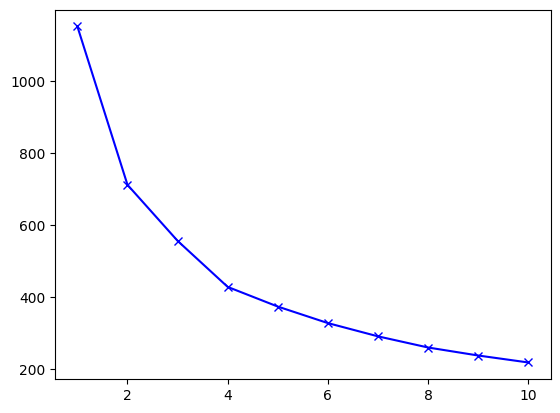

In [ ]:

# data normalization
scaler = MinMaxScaler()
scaler.fit(df[['latitude', 'longitude', 'price', 'number_of_reviews']])
elbow_data = scaler.transform(df[['latitude', 'longitude', 'price', 'number_of_reviews']])

# scatterplot using the elbow method 
K = range(1,11)
Sum_of_squares = []
for num_clusters in K:
    km = KMeans(n_clusters = num_clusters)
    km = km.fit(elbow_data)
    Sum_of_squares.append(km.inertia_)
plt.plot(K, Sum_of_squares, 'bx-')
plt.show()


-> I would recomend using 4 clusters.

-> We should normalize the price and number of reviews to improve the efficiency of our clustering algorithm and eliminate the redudency of data.
This is because the Euclidean distance is sensitive to changes in the differences. 
without normalization, it is hard to measure the distance in accordance to equal weight of each variable.
price and number of reviews are completely different kinds of data that can not be made into weights with reasonable comparisions to each other. Thus, normalizing it to set equal weight of each variable helps in making predictions and utelizing data more efficiently.

Step 10) For all listings of type `Shared room`, plot the dendrogram of the hierarchical clustering generated from `longitude`, `latitude`, and `price`. 


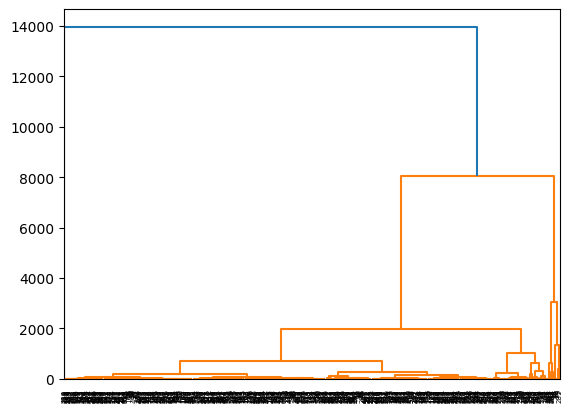

In [ ]:
# imports
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# dataframe:
shared_room_listings = df[df.room_type  == 'Shared room']
dendro_data = shared_room_listings[['latitude', 'longitude', 'price']]

# plotting the dendrogram
clusters = shc.linkage(dendro_data, method='ward', metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

-> The height of the branch indicate how similar they are. The branches on the right most side are seen to be taller than that of the left of the dendrogram, showing the degree of difference. The width indicates that every chunk within that cluster is more similar to each other than to any chunks that join at a higher level. 

Step 11) Normalize the `price` 

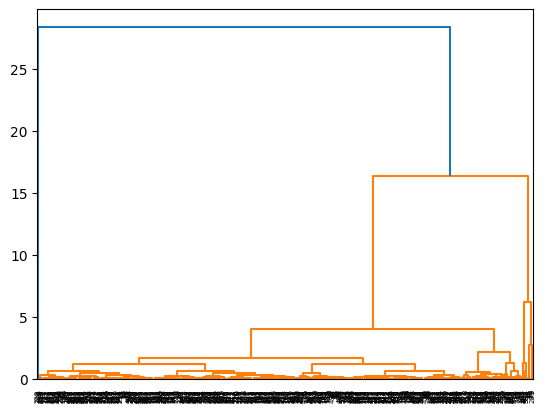

In [ ]:
# normalized price = (price - mean)/stdv
pd.options.mode.chained_assignment = None 

mean_price = dendro_data['price'].mean()
stdev_price = dendro_data['price'].std()
dendro_data['normalized price'] = (dendro_data['price'] - mean_price)/stdev_price

norm_dendro_data = dendro_data[['latitude', 'longitude', 'normalized price']]

# plotting dendrogram
clusters = shc.linkage(norm_dendro_data, method='ward', metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()